In [2]:
import pandas as pd
import xml.etree.cElementTree as ET
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


def parseXML(New_Text_Document):
   # Parse XML with ElementTree
   tree = ET.parse(New_Text_Document)
#    print(tree.getroot())
   root = tree.getroot()
   
   print("tag=%s, attrib=%s" % (root.tag, root.attrib))

   # get the information via the children!
   print("-" * 25)
   print("Iterating using getchildren()")
   print("-" * 25)
   rows = []
   df_cols = ["id", "company","Title","FullDescription","Location","ContractTime","ContractType","Category","OpenDate","Salary","CloseDate","SourceName"]
#    jobs = root.getchildren()
   for node in root.iter():
          if node.tag=="Job":
#                 print(node.find("Id").text)                
#                 print(node.find("Company").text)
                try:
                    rows.append({"id": node.find("Id").text,"ContractType": node.find("ContractType").text, "company": node.find("Company").text,"Title": node.find("Title").text,"FullDescription": node.find("FullDescription").text,"Location": node.find("Location").text,"ContractTime": node.find("ContractTime").text,"Category": node.find("Category").text,"Salary": node.find("Salary").text,"OpenDate": node.find("OpenDate").text,"CloseDate": node.find("CloseDate").text})
                except:
#                     print(node.find("Id"))
                      pass
#           user_children = job.getchildren()
#           for user_child in user_children:
#              print("%s=%s" % (user_child.tag, user_child.text))
   out_df = pd.DataFrame(rows, columns = df_cols)
    
   out_df.to_csv("test.csv", index=False)
  

if __name__ == "__main__":
   parseXML("data_ass2.dat")

data=pd.read_csv('test.csv')
   
data

tag=JobAds, attrib={}
-------------------------
Iterating using getchildren()
-------------------------


,id,company,Title,FullDescription,Location,ContractTime,ContractType,Category,OpenDate,Salary,CloseDate,SourceName
0,54900518,Engage Education,Primary Teachers Norfolk / Suffolk,Engage Education is a rapidly expanding teachi...,Norfolk,contract,part_time,Teaching Jobs,20121008T000000,30000,20121207T000000,NaN
1,66178897,Neville Gee,Contact Centre Agent,"Job Purpose: To generate leads, sales revenue ...",Lancashire,permanent,part_time,Sales Jobs,20120912T150000,13440,20121211T150000,NaN
2,66886053,Quattro Recruitment Ltd,Tele Fundraising agents,Our client is currently seeking Telesales Fund...,Norwich,permanent,part_time,Sales Jobs,20120422T120000,12240,20120721T120000,NaN
3,67643933,Solutions2Recruitment,PA To Headmistress,PA Educational Environment (39 weeks per annu...,Brighton,permanent,part_time,Teaching Jobs,20121224T150000,19500,20130123T150000,NaN
4,69004280,We Are Recruitment,Experienced Teaching Assistant,Are you an experienced Teaching Assistant with...,London,contract,part_time,Teaching Jobs,20120531T120000,19200,20120614T120000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29863,72342209,Finegreen Associates,Head of Childrens Service,My client is an independent day and residentia...,North West London,permanent,NaN,Healthcare & Nursing Jobs,20130810T150000,45000,20131108T150000,NaN
29864,72342216,Family Nursing and Home Care,Divisional Manager for Clinical Services,Family Nursing and Home Care is a registered c...,Jersey,permanent,NaN,Healthcare & Nursing Jobs,20121105T120000,55943,20130104T120000,NaN
29865,72342223,Finegreen Associates,Interim Employment Relations Adviser,"Our client, a local government organisation in...",London,contract,NaN,Healthcare & Nursing Jobs,20120806T150000,39840,20120820T150000,NaN
29866,72342224,University Hospitals Southampton NHS Foundatio...,Care Group Manager – Emergency Care,The Emergency Medicine Care Group provides ser...,Southampton,permanent,NaN,Healthcare & Nursing Jobs,20120607T120000,NaN,20120905T120000,NaN


# Remove Duplicate Rows 

In [3]:
data.drop_duplicates(subset =['company', 'Title', 'FullDescription', 'Location', 'ContractTime', 'Category', 'OpenDate','CloseDate','Salary'], 
                   inplace=True)
                   
data.shape

(29867, 12)

In [4]:
Cdata = pd.read_csv('test.csv')[['Location', 'Title', 'ContractTime', 'Category', 'Salary']]

Cdata.head()

,Location,Title,ContractTime,Category,Salary
0,Norfolk,Primary Teachers Norfolk / Suffolk,contract,Teaching Jobs,30000
1,Lancashire,Contact Centre Agent,permanent,Sales Jobs,13440
2,Norwich,Tele Fundraising agents,permanent,Sales Jobs,12240
3,Brighton,PA To Headmistress,permanent,Teaching Jobs,19500
4,London,Experienced Teaching Assistant,contract,Teaching Jobs,19200


# Cleaning ' Title Column'

In [5]:
for column in ['Location', 'Title', 'ContractTime', 'Category', 'Salary']:
    print(column, Cdata[column].nunique())

Location 477
Title 29865
ContractTime 4
Category 8
Salary 2063


As there are way more too may titles for the job, i want to reduce the number. As the single job title can be relevent to other job titles.

In [6]:
#first i will remove the white space and will capitalizing the words in a title.
def clean_job_title(title):
    if title[-1] == " ":
        return title[:-1].title()
    else:
        return title.title()

In [7]:
Cdata['Title'] = Cdata['Title'].apply(clean_job_title)

In [8]:
# i will focus on job titles which have words ' Analyst' or 'Data' 
relevant_jobs = []
irrelevant_jobs = []
for title in list(Cdata['Title'].value_counts().index):
    if ' Analyst' in title:
        relevant_jobs.append(title)
    elif 'Data' == title:
        relevant_jobs.append(title)
    else:
        irrelevant_jobs.append(title)
len(relevant_jobs)

1817

In [9]:
Cdata = Cdata[Cdata['Title'].isin(relevant_jobs)]

In [10]:
#Now i will try to categorize the titles which are similar 

#  words' Analyst' or 'Analytics' in the title will be classified as 'Data Analyst' 
analyst_jobs = []
for title in relevant_jobs:
    if 'Analyst' in title:
        analyst_jobs.append(title)
    elif 'Analytics' in title:
        analyst_jobs.append(title)
        
# Words 'Administration', 'Administrator', 'Admin' or 'Entry'  in title will be classified as 'Data Administrator' 
administration_jobs = []
for title in relevant_jobs:
    if 'Administration' in title:
        administration_jobs.append(title)
    elif 'Administrator' in title:
        administration_jobs.append(title)
    elif 'Admin' in title:
        administration_jobs.append(title)
    elif 'Entry' in title:
        administration_jobs.append(title)
# Word 'Architect' in title is treated as  'Data Architect'
architect_jobs = []
for title in relevant_jobs:
    if 'Architect' in title:
        architect_jobs.append(title)
# Words 'Development' or 'Developer' in the title will be classified as 'Developer with Data'
development_jobs = []
for title in relevant_jobs:
    if 'Development' in title:
        development_jobs.append(title)
    elif 'Developer' in title:
        development_jobs.append(title)
# Words'Model' or 'Modelling' in the title will be classified as 'Data Modelling Job'
modelling_jobs = []
for title in relevant_jobs:
    if 'Model' in title:
        modelling_jobs.append(title)
    elif 'Modelling' in title:
        modelling_jobs.append(title)
#Words 'Analyst' and 'Senior' in the title will be classified as 'Senior Data Analyst'
senior_analyst_jobs = []
for title in relevant_jobs:
    if ('Analyst' in title) & ('Senior' in title):
        senior_analyst_jobs.append(title)
        
#Words'Analyst' and 'Junior' in title will be classified as 'Senior Data Analyst'
junior_analyst_jobs = []
for title in relevant_jobs:
    if ('Analyst' in title) & ('Junior' in title):
        junior_analyst_jobs.append(title)

# Word 'Migration' in title will be classified as 'Data Migration Job' 
migration_jobs = []
for title in relevant_jobs:
    if 'Migration' in title:
        migration_jobs.append(title)
#Word 'Consultant' in the title will be classified as 'Consultant with Data' 
consultant_jobs = []
for title in relevant_jobs:
    if 'Consultant' in title:
        consultant_jobs.append(title)
#Words 'Manager' or 'Management'in the title will be classified as 'Manager with Data' 
manager_jobs = []
for title in relevant_jobs:
    if 'Manager' in title:
        manager_jobs.append(title)
    if 'Management' in title:
        manager_jobs.append(title)
#Words 'Scientist' or 'Science' in the title will be classified as 'Data Scientist' 
scientist_jobs = []
for title in relevant_jobs:
    if 'Scientist' in title:
        scientist_jobs.append(title)
    elif 'Science' in title:
        scientist_jobs.append(title)
#Word 'Engineer' in the title will be classified as 'Data Engineer'       
engineer_jobs = []
for title in relevant_jobs:
    if 'Engineer' in title:
        engineer_jobs.append(title)

In [11]:
# Each job title is classified according to the names assigned above 
Classified_Job_Titles = []
for job in list(Cdata['Title']):    
        if job in administration_jobs:
            Classified_Job_Titles.append('Data Administrator')
        elif job in modelling_jobs:
            Classified_Job_Titles.append('Data Modelling Job')              
        elif job in architect_jobs:
            Classified_Job_Titles.append('Data Architect')
        elif job in development_jobs:
            Classified_Job_Titles.append('Developer Job Using Data')
        elif job in migration_jobs:
            Classified_Job_Titles.append('Data Migration Job')
        elif job in consultant_jobs:
            Classified_Job_Titles.append('Consultant Involving Data')            
        elif job in manager_jobs:
            Classified_Job_Titles.append('Manager Involving Data') 
        elif job in scientist_jobs:
            Classified_Job_Titles.append('Data Scientist')    
        elif job in engineer_jobs:
            Classified_Job_Titles.append('Data Engineer') 
        elif job in manager_jobs:
            Classified_Job_Titles.append('Data Manager')
        elif job in analyst_jobs:
            Classified_Job_Titles.append('Data Analyst')
        elif job in junior_analyst_jobs:
            Classified_Job_Titles.append('Junior Data Analyst')           
        elif job in senior_analyst_jobs:
            Classified_Job_Titles.append('Senior Data Analyst')
        else:
            Classified_Job_Titles.append('No Title')

Cdata['Job Title'] = Classified_Job_Titles

In [12]:
Cdata['Job Title'].value_counts()

Data Analyst                 1573
Developer Job Using Data       79
Manager Involving Data         68
Data Modelling Job             32
Data Engineer                  31
Data Administrator             14
Consultant Involving Data       9
Data Architect                  8
Data Migration Job              2
Data Scientist                  2
Name: Job Title, dtype: int64

In [13]:
#i will drop with the rows with 'NO Title'
Cdata = Cdata[Cdata['Job Title'] != 'No Title']

In [14]:
Cdata['Title'] = Cdata['Job Title'] #Replace the Title with modified Title column 

In [15]:
Cdata.drop(columns=['Job Title']) #Removes the the job title column which is not requied 

,Location,Title,ContractTime,Category,Salary
56,London,Data Analyst,permanent,Accounting & Finance Jobs,45000
57,Hampshire,Data Analyst,permanent,Accounting & Finance Jobs,25500
70,Bradford,Data Analyst,permanent,IT Jobs,18500
86,Leicestershire,Data Analyst,permanent,"PR, Advertising & Marketing Jobs",24000
90,Dorset,Data Analyst,contract,IT Jobs,84000
...,...,...,...,...,...
29793,London,Data Analyst,permanent,Accounting & Finance Jobs,48000
29808,London,Manager Involving Data,permanent,"PR, Advertising & Marketing Jobs",32500
29837,Avon,Data Analyst,permanent,Accounting & Finance Jobs,33000
29838,Berkshire,Data Analyst,contract,Accounting & Finance Jobs,39360


In [17]:
Cdata.dropna(inplace=True)
Cdata

,Location,Title,ContractTime,Category,Salary,Job Title
56,London,Data Analyst,permanent,Accounting & Finance Jobs,45000,Data Analyst
57,Hampshire,Data Analyst,permanent,Accounting & Finance Jobs,25500,Data Analyst
70,Bradford,Data Analyst,permanent,IT Jobs,18500,Data Analyst
86,Leicestershire,Data Analyst,permanent,"PR, Advertising & Marketing Jobs",24000,Data Analyst
90,Dorset,Data Analyst,contract,IT Jobs,84000,Data Analyst
...,...,...,...,...,...,...
29793,London,Data Analyst,permanent,Accounting & Finance Jobs,48000,Data Analyst
29808,London,Manager Involving Data,permanent,"PR, Advertising & Marketing Jobs",32500,Manager Involving Data
29837,Avon,Data Analyst,permanent,Accounting & Finance Jobs,33000,Data Analyst
29838,Berkshire,Data Analyst,contract,Accounting & Finance Jobs,39360,Data Analyst


In [18]:
Cdata['Salary'].value_counts()

35000            93
45000            81
40000            74
30000            74
42500            60
                 ..
47500 - 52500     1
25920             1
17340             1
77000             1
32300             1
Name: Salary, Length: 264, dtype: int64

# Cleaning Salary Column

In [19]:
#create a new column of salary to work on
Cdata['mod_Salary'] = Cdata['Salary']


In [20]:
#WIll create a function which change blank space,'-',nan,'0' to Na. And as there are pa, per annum, /year which is not requried.
#K is replaced with 000 and the average is taken where there are two numbers 
def pay_info(salary_info):
    if salary_info == '':
        return 'NA'
    elif salary_info == ' ':
        return 'NA'
    elif salary_info == '-':
        return 'NA'
    elif salary_info=='nan':
        return 'NA'
    elif salary_info == '0':
        return 'NA'
    
    elif 'pa' in salary_info.lower():
        return salary_info.replace(' pa','')
     
    elif 'per annum' in salary_info.lower():
        return salary_info.lower().replace(' per annum','')
    
    elif '/year' in salary_info.lower():
        return salary_info.lower().replace('/year','')
    
    elif 'k' in salary_info.lower():
        return salary_info.lower().replace('k','000')
    
    elif 'to' in salary_info.lower():
        min= (int)(salary_info.lower().split('to')[0])
        max =(int)(salary_info.lower().split('to')[1])
        print("min: ", min, " max: ", max)
        return (str)(int((min+max)/2))
    elif '-' in salary_info.lower():
        min= (int)(salary_info.lower().split('-')[0])
        max =(int)(salary_info.lower().split('-')[1])
        print("min: ", min, " max: ", max)
        return (str)(int((min+max)/2))
    
    else:
        return salary_info
    
    

In [21]:
# lets apply this above function to new salary column created 
Cdata['mod_Salary'] = Cdata['mod_Salary'].astype('str').apply(pay_info)

min:  49750  max:  50250
min:  47500  max:  52500
min:  31000  max:  33000
min:  29000  max:  31000
min:  37000  max:  38000
min:  27250  max:  27750
min:  42500  max:  47500
min:  30750  max:  31250
min:  34000  max:  36000


In [22]:
#Replacing the modified salary column
Cdata['Salary'] = Cdata['mod_Salary']

In [23]:
# i will drop the unwanted Salary Column
df=Cdata.drop(columns=['mod_Salary'])

In [24]:
df.dropna(inplace=True)


# Cleaning ContractTime Column

In [25]:
df.ContractTime.unique()

array(['permanent', 'contract', '-', ' '], dtype=object)

In [26]:
# I will cosider the rows with nothing specified in the contract time as contract because they might be some freelance jobs
df['ContractTime'] = df['ContractTime'].map(lambda x: 'Contract' if x != 'permanent' else x)

In [27]:
df.ContractTime.unique()

array(['permanent', 'Contract'], dtype=object)

In [28]:
Mdata=df[['Title','ContractTime','Location','Category','Salary']]
Mdata.to_csv("newtest.csv",index=False) #Even if i  used dropna() the NA values are still present so i saved the file and tried to use R to remove NA values 

In [29]:
Mdata=pd.read_csv('newtest2.csv') # Now this data set has no NA values 

In [30]:
Mdata['Salary'] = Mdata['Salary'].astype(int) 

# Visualisation

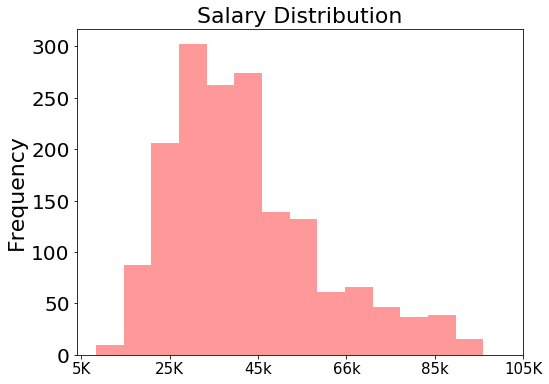

In [31]:
plt.figure(figsize=(8, 6))
sns.distplot(Mdata['Salary'],kde=False,bins=14,color='r')
plt.title("Salary Distribution", fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.xlabel('', fontsize=3)
plt.yticks(fontsize=20)
plt.xticks([5000,25000, 45000,65000,85000,105000],['5K', '25K','45k','66k','85k','105K'], fontsize=15)
plt.show()


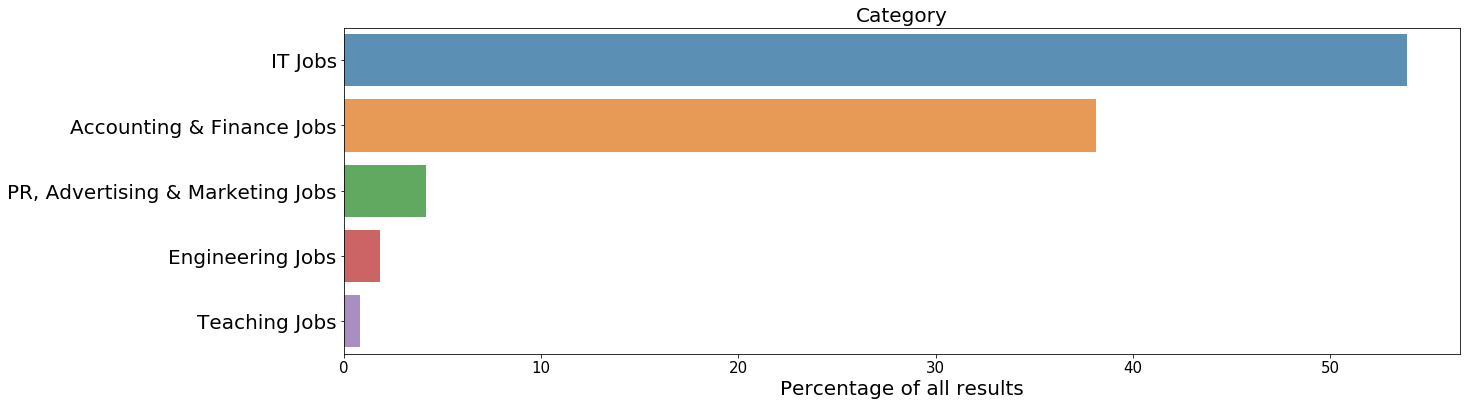

In [32]:
newyorkTimezone = Mdata['Category'].value_counts(normalize=True).head()*100
plt.figure(figsize=(20, 6))
sns.barplot(y = newyorkTimezone.index, x = newyorkTimezone.values, alpha=0.8)
plt.title('Category', fontsize=20)
plt.ylabel('', fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Percentage of all results', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

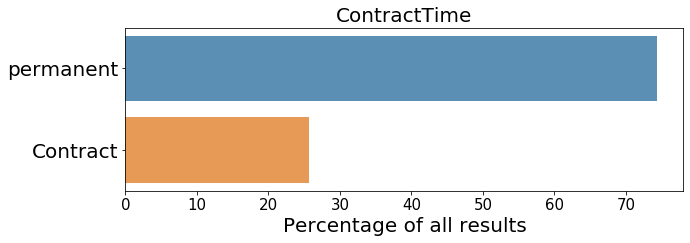

In [33]:
newyorkTimezone = Mdata['ContractTime'].value_counts(normalize=True).head()*100
plt.figure(figsize=(10, 3))
sns.barplot(y = newyorkTimezone.index, x = newyorkTimezone.values, alpha=0.8)
plt.title('ContractTime', fontsize=20)
plt.ylabel('', fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Percentage of all results', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

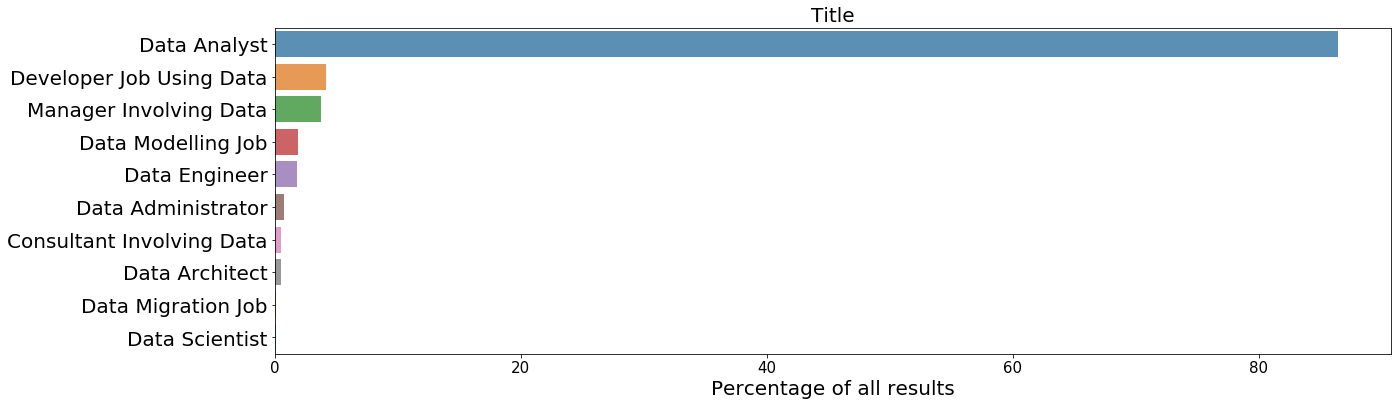

In [34]:
newyorkTimezone = Mdata['Title'].value_counts(normalize=True)*100
plt.figure(figsize=(20, 6))
sns.barplot(y = newyorkTimezone.index, x = newyorkTimezone.values, alpha=0.8)
plt.title('Title', fontsize=20)
plt.ylabel('', fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Percentage of all results', fontsize=20)
plt.xticks(fontsize=15)
plt.show()

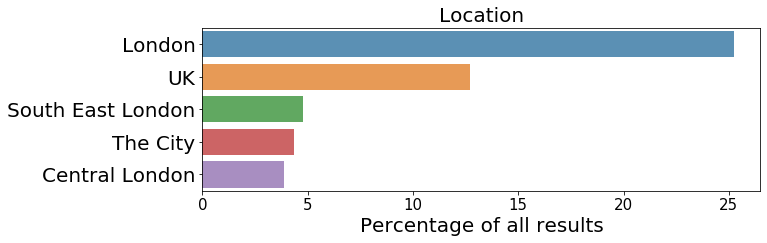

In [35]:
newyorkTimezone = Mdata['Location'].value_counts(normalize=True).head()*100
plt.figure(figsize=(10, 3))
sns.barplot(y = newyorkTimezone.index, x = newyorkTimezone.values, alpha=0.8)
plt.title('Location', fontsize=20)
plt.ylabel('', fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Percentage of all results', fontsize=20)
plt.xticks(fontsize=15)
plt.show()


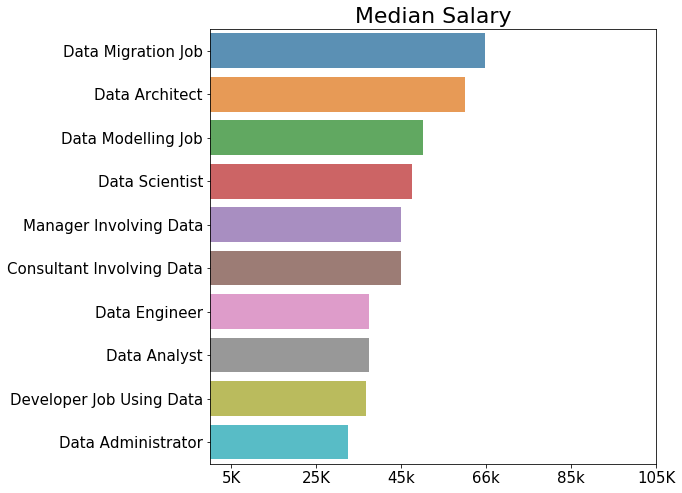

In [36]:
# i will plot average salary vs different jobs
newyorkTimezone = Mdata.groupby('Title')['Salary'].median().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
sns.barplot(y=newyorkTimezone.index, x=newyorkTimezone.values, alpha=0.8)
plt.title("Median Salary", fontsize=22)
plt.ylabel('', fontsize=20)
plt.xlabel('', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks([5000,25000, 45000,65000,85000,105000],['5K', '25K','45k','66k','85k','105K'], fontsize=15)
plt.show()
